Neural Network practical with MNIST dataset

In [29]:
from keras.datasets import mnist

In [30]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [31]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


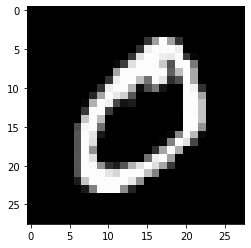

In [32]:
import matplotlib.pyplot as plt
plt.imshow(x_train[1,:,:].reshape(28,28),cmap='gray')
plt.show()

In [33]:
y_train[1]

0

In [ ]:
#Convert labels in one hot vector
from keras.utils import to_categorical
y_train_encoded = to_categorical(y_train)
y_test_encoded = to_categorical(y_test)

In [34]:
y_train_encoded[1]

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [35]:
# Normalize the images.
x_train_norm = (x_train / 255) - 0.5
x_test_norm = (x_test / 255) - 0.5

In [36]:
print(x_train_norm.shape)
print(x_train[1,1,1],x_train_norm[1,1,1])


(60000, 28, 28)
0 -0.5


In [37]:
# Flatten the images.
x_train_images = x_train_norm.reshape((-1, 784))
x_test_images = x_test_norm.reshape((-1, 784))


In [ ]:
print(x_train_images.shape)
print(y_train_encoded.shape)
print(x_test_images.shape)
print(y_test_encoded.shape)

(60000, 784)
(60000, 10)
(10000, 784)
(10000, 10)


In [38]:
from keras.models import Sequential
from keras.layers import Dense
model = Sequential()
model.add(Dense(64, input_dim=784, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [40]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 64)                50240     
_________________________________________________________________
dense_4 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_5 (Dense)              (None, 10)                330       
Total params: 52,650
Trainable params: 52,650
Non-trainable params: 0
_________________________________________________________________


In [41]:
# Training a model on Train data and at the end it will updates the weights.
model.fit(x_train_images, y_train_encoded, epochs=20, batch_size=16)

Epoch 1/20
3750/3750 [==============================] - 5s 1ms/step - loss: 0.3376 - accuracy: 0.8960
Epoch 2/20
3750/3750 [==============================] - 5s 1ms/step - loss: 0.1820 - accuracy: 0.9444
Epoch 3/20
3750/3750 [==============================] - 5s 1ms/step - loss: 0.1442 - accuracy: 0.9562
Epoch 4/20
3750/3750 [==============================] - 5s 1ms/step - loss: 0.1227 - accuracy: 0.9628
Epoch 5/20
3750/3750 [==============================] - 5s 1ms/step - loss: 0.1107 - accuracy: 0.9661
Epoch 6/20
3750/3750 [==============================] - 5s 1ms/step - loss: 0.0995 - accuracy: 0.9692
Epoch 7/20
3750/3750 [==============================] - 5s 1ms/step - loss: 0.0922 - accuracy: 0.9711
Epoch 8/20
3750/3750 [==============================] - 5s 1ms/step - loss: 0.0842 - accuracy: 0.9733
Epoch 9/20
3750/3750 [==============================] - 5s 1ms/step - loss: 0.0796 - accuracy: 0.9745
Epoch 10/20
3750/3750 [==============================] - 5s 1ms/step - loss: 0.074

In [42]:
# Evaluate the model
scores = model.evaluate(x_test_images, y_test_encoded)
print("\nAccuracy: %.2f%%" % (scores[1]*100))

313/313 [==============================] - 0s 915us/step - loss: 0.1065 - accuracy: 0.9717

Accuracy: 97.17%


In [ ]:
# save the model's saved weights
model.save_weights('mnistmodel.h5')

#Build the model again and load the weights.

# Load the model's saved weights
model.load_weights('mnistmodel.h5')

You can try below things in this code.
1. Effects of Tuning Hyperparameters. (Learning rate, epochs, batch size). Take different values and observ the accuracy.
2. Impact of no, of Hidden Layers. Change the number of layer and neurons in the layers.
3. Check the impact of Activation functions and dropout.
4. You can chose other dataset having only one channel (Gray scale image). (Link: https://www.kaggle.com/zalando-research/fashionmnist)